In [ ]:
!pip install MiniSom


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=ccb281824d1824c4e54a627c45d94cb29aa945485bead7930fbec81ca40f15e2
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


In [ ]:
        x : int
            x dimension of the SOM.
        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

        sigma : float, optional (default=1.0)
            Spread of the neighborhood function, needs to be adequate
            to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T)
            where T is #num_iteration/2)

        learning_rate : initial learning rate
            (at the iteration t we have
            learning_rate(t) = learning_rate / (1 + t/T)
            where T is #num_iteration/2)

        sigma : float, optional (default=1.0)
            Spread of the neighborhood function, needs to be adequate
            to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T)
            where T is #num_iteration/2)

        learning_rate : initial learning rate
            (at the iteration t we have
            learning_rate(t) = learning_rate / (1 + t/T)
            where T is #num_iteration/2)

        decay_function : function (default=asymptotic_decay)
            Function that reduces learning_rate and sigma at each iteration
            the default function is:
                        learning_rate / (1+t/(max_iterarations/2))


        neighborhood_function : string, optional (default='gaussian')
            Function that weights the neighborhood of a position in the map.
            Possible values: 'gaussian', 'mexican_hat', 'bubble', 'triangle'

        topology : string, optional (default='rectangular')
            Topology of the map.
            Possible values: 'rectangular', 'hexagonal'

        activation_distance : string, callable optional (default='euclidean')
            Distance used to activate the map.
            Possible values: 'euclidean', 'cosine', 'manhattan', 'chebyshev'




In [ ]:
from minisom import MiniSom
import numpy as np
import pandas as pd


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2023-02-08 14:49:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-08 14:49:55 (92.8 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



In [ ]:
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
#                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
#                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5],
#                   sep='\t+', engine='python')

data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')
data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')
data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1,3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.5669624735812637


In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index

array([1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

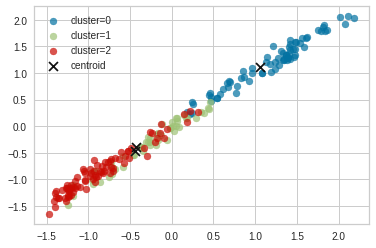

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

# Elbow v1 - distortion inertia

The optimal number of clusters is determined visually by looking for the kink or elbow in the plot after the distortion/inertia starts decreasing linearly.

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')

data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
data

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [ ]:
X = data
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.475321034474339
2 : 1.6593117112776161
3 : 1.3280063314769626
4 : 1.2340696914802198
5 : 1.1547005519199938
6 : 1.103015133292624
7 : 1.053579212608679
8 : 1.0009874230320268
9 : 0.9595485727722856


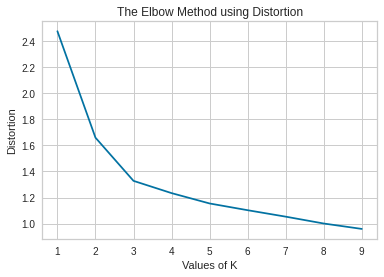

In [ ]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Elbow - YB - 'calinski_harabasz'

Calinski-Harabasz Index

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

A high CH means better clustering since observations in each cluster are closer together (more dense), while clusters themselves are further away from each other (well separated).


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


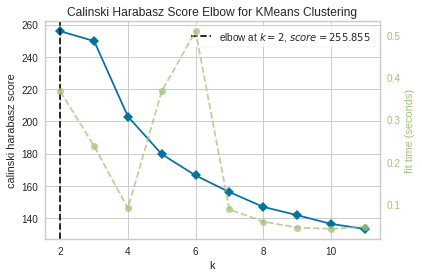

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')

data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
data



# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

## Elbow distortion - intertia


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


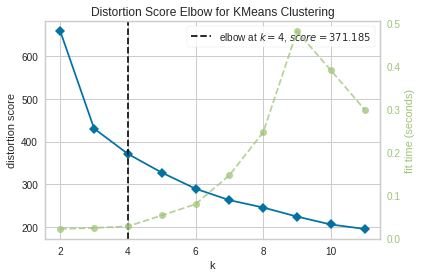

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')

data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
data



from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

## silhouette


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


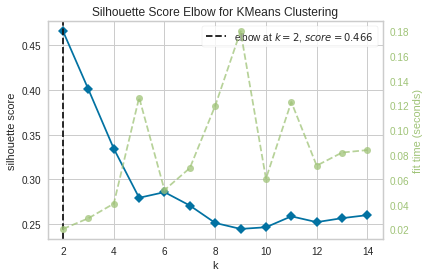

In [ ]:
#silhouette

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



data = pd.read_csv("/content/seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],  sep='\t+')

data = data[['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']]

data

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
data


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
#https://github.com/smazzanti/are_you_still_using_elbow_method/blob/main/are-you-still-using-elbow-method.ipynb
#https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773
#https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773
#https://github.com/smazzanti/are_you_still_using_elbow_method/blob/main/are-you-still-using-elbow-method.ipynb